In [91]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors
tfpl = tfp.layers

print(tfp.__version__)

0.12.2


In [4]:
n_samples = 1000
noisy_moons = datasets.make_moons(n_samples=n_samples)
X, y = noisy_moons
X_data = StandardScaler().fit_transform(X)
xlim, ylim = [-2, 2], [-2, 2]

/var/folders/vf/5n8g0z2n3rngl6zxbtg87x3r0000gn/T/ipykernel_8204/2438361541.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_label = y.astype(np.bool)


(-2.0, 2.0)

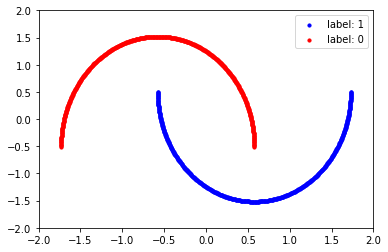

In [23]:
y_label = y.astype(np.bool)
X_train, Y_train = X_data[..., 0], X_data[..., 1]
plt.scatter(X_train[y_label], Y_train[y_label], s=10, color='blue')
plt.scatter(X_train[y_label == False], Y_train[y_label == False], s=10, color='red')
plt.legend(['label: 1', 'label: 0'])
plt.xlim(xlim)
plt.ylim(ylim)

In [26]:
# define base distribution 
base_distribution = tfd.Normal(loc=0., scale=1.)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-24 20:38:38.682721: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 20:38:38.682912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
base_distribution.sample(1)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.3881888], dtype=float32)>

In [93]:
# define the trainable distribution

def make_masked_autoregressive_flow(hidden_units=[16, 16], activation='relu'):
    # use the buildt in autoregressive network in tensorflow
    made = tfb.AutoregressiveNetwork(
        params=2, event_shape=[2], hidden_units=hidden_units, activation=activation)
    return tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made)

trainable_distribution = tfd.TransformedDistribution(tfd.Sample(base_distribution, sample_shape=[2]),
                                                     make_masked_autoregressive_flow(),
                                                     name='simple_gaussian')


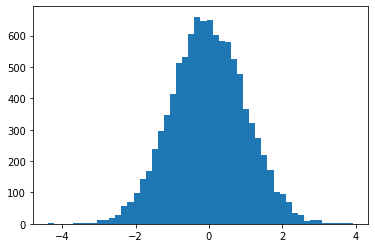

In [50]:
samples = base_distribution.sample(10000).numpy()
plt.figure()
plt.hist(samples, bins=50)
plt.show()

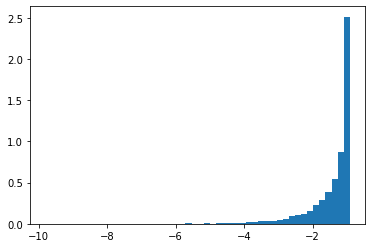

In [43]:
samples = base_distribution.sample(10000)
log_samples = base_distribution.log_prob(samples).numpy()
plt.figure()
plt.hist(log_samples, bins=50, density=True)
plt.show()

In [57]:

a = np.arange(5)
b = np.arange(5)

A, B = np.meshgrid(a, b)
C = np.dstack((A, B))
C.shape

(5, 5, 2)

In [51]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [119]:
def plot_contour_plot(dist, rows=1, title=[''], scale_fig=4):
    cols = int(len(dist) / rows)
    xx = np.linspace(-5.0 , 5.0, 100)
    yy = np.linspace(-5.0 , 5.0, 100)
    X, Y = np.meshgrid(xx, yy)

    fig, ax = plt.subplots(rows, cols, figsize=(scale_fig * cols, scale_fig * rows))
    fig.tight_layout(pad=4.5)
    
    i = 0
    for r in range(rows):
        for c in range(cols):
            Z = dist[i].prob(np.dstack((X, Y)))
                 
            if len(dist) == 1:
                axi = ax
            elif rows == 1:
                axi = ax[c]
            else:
                axi = ax[r, c]
            
            # plot contour
            p = axi.contourf(X, Y, Z)

            divider = make_axes_locatable(axi)
            cax = divider.append_axes("right", size="5%", pad=0.1)
            cbar = fig.colorbar(p, cax=cax)
            
            # set title and labels
            axi.set_title('Filled Contours Plot: ' + str(title[i]))
            axi.set_xlabel('x')
            axi.set_ylabel('y')
            print(i)
            i += 1

    plt.show()


ValueError: Input is neither scalar nor vector.

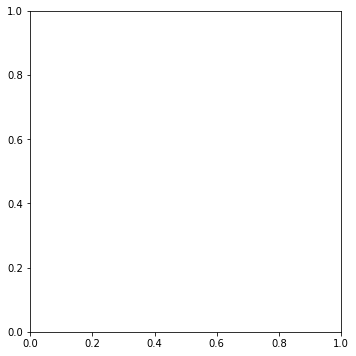

In [120]:
activation = 'relu'
maf = tfd.TransformedDistribution(tfd.Sample(base_distribution, sample_shape=[2]),
                                  make_masked_autoregressive_flow(activation=activation))

plot_contour_plot([maf], scale_fig=6, title=[activation])


In [100]:
np.zeros([10, 10])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])